In [1]:
from environments import ZeroDCleanupEnv
from agents import QAgent
import numpy as np
from collections import defaultdict
import torch
import sys
from tqdm import tqdm

2023-11-22 00:19:52,115	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
np.set_printoptions(threshold=sys.maxsize)

cpu


In [3]:
num_agents = 10
agent_ids = [str(i) for i in range(num_agents)]
reward_multiplier = 10

In [4]:
pp = False
verbose = False

In [5]:
num_episodes = 200
verbose_episode = num_episodes - 1
max_steps_per_episode = 1000
state_dim = 4
action_dim = 2

In [6]:
thresholdDepletion = 0.4
thresholdRestoration = 0.0
wasteSpawnProbability = 0.5
appleRespawnProbability = 0.05
dirt_multiplier = 10

area = 150

In [7]:
lr = 0.01
gamma = 0.99
epsilon = 0.5
epsilon_decay = 0.9999
epsilon_min = 0.05
batch_size = 128

In [8]:
env = ZeroDCleanupEnv(agent_ids, 
                      num_agents=num_agents, 
                      area=area, 
                      thresholdDepletion=thresholdDepletion,
                      thresholdRestoration=thresholdRestoration,
                      wasteSpawnProbability=wasteSpawnProbability,
                      appleRespawnProbability=appleRespawnProbability,
                      dirt_multiplier=dirt_multiplier)

agents = {
    agent_id: QAgent(device=device,
                    num_action_outputs=1,
                    action_size=action_dim,
                    state_dim=state_dim,
                    lr=lr,
                    gamma=gamma,
                    epsilon=epsilon,
                    epsilon_decay=epsilon_decay,
                    epsilon_min=epsilon_min,
                    batch_size=batch_size,
                    q_layers=[
                        (state_dim, 16),
                        (16, 8),
                        #(64, 64),
                        #(16, 16),
                        (8, action_dim)
                    ],
                    verbose=False)
    for agent_id in agent_ids
}

In [9]:
ending_ep_rewards = []
avg_agent_rewards = []
agent_reward_variances = []
weight_graph = defaultdict(list)

In [10]:
import uuid
import os

if not os.path.exists("results"):
    os.mkdir("results")

test_id = uuid.uuid4()
os.mkdir("results/q_simple_" + str(test_id))
f = open("results/q_simple_" + str(test_id) + "/logs.txt", "x")

In [11]:
for episode in range(num_episodes):
    print(f"========= Episode {episode} =========")
    f.write(f"========= Episode {episode} =========\n")

    states, info = env.reset()

    print(f"info: {info}")
    f.write(f"info: {info}\n")

    for step in tqdm(range(max_steps_per_episode)):
        actions = {agent_id: agents[agent_id].act(states[agent_id]) for agent_id in agent_ids}
        next_states, rewards, dones, _, info = env.step(actions)
        
        for agent_id in agent_ids:
            agents[agent_id].step(states[agent_id], actions[agent_id], rewards[agent_id], next_states[agent_id])

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")
            f.write(f"========= Step {step} =========\n")
            f.write(f"info: {info}\n")

        states = next_states

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]
    total_reward_by_agent = info["total_reward_by_agent"]

    print(f"ending reward: {ending_reward}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Episode {episode} =========")
    
    f.write(f"ending reward: {ending_reward}\n")
    #f.write(f"reward graph: {reward_graph}\n")
    f.write(f"========= End of Episode {episode} =========\n")

    ending_ep_rewards.append(ending_reward)
    avg_agent_rewards.append(ending_reward / num_agents)
    agent_reward_variances.append(np.var(list(total_reward_by_agent.values())))
        

========= Episode 0 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


 13%|█▎        | 129/1000 [00:00<00:00, 939.51it/s]

100%|█████████▉| 999/1000 [00:08<00:00, 112.88it/s]


ending reward: 2614
========= End of Episode 0 =========
========= Episode 1 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.49it/s]


ending reward: 2508
========= End of Episode 1 =========
========= Episode 2 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 99.07it/s] 


ending reward: 2426
========= End of Episode 2 =========
========= Episode 3 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.87it/s]


ending reward: 2069
========= End of Episode 3 =========
========= Episode 4 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 97.31it/s] 


ending reward: 1896
========= End of Episode 4 =========
========= Episode 5 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.09it/s]


ending reward: 1513
========= End of Episode 5 =========
========= Episode 6 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 99.09it/s] 


ending reward: 1463
========= End of Episode 6 =========
========= Episode 7 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.25it/s]


ending reward: 1109
========= End of Episode 7 =========
========= Episode 8 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.96it/s]


ending reward: 901
========= End of Episode 8 =========
========= Episode 9 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.98it/s]


ending reward: 684
========= End of Episode 9 =========
========= Episode 10 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.43it/s]


ending reward: 515
========= End of Episode 10 =========
========= Episode 11 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.00it/s]


ending reward: 597
========= End of Episode 11 =========
========= Episode 12 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.52it/s]


ending reward: 398
========= End of Episode 12 =========
========= Episode 13 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 84.26it/s] 


ending reward: 520
========= End of Episode 13 =========
========= Episode 14 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 81.04it/s] 


ending reward: 259
========= End of Episode 14 =========
========= Episode 15 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 85.67it/s] 


ending reward: 203
========= End of Episode 15 =========
========= Episode 16 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 85.70it/s] 


ending reward: 243
========= End of Episode 16 =========
========= Episode 17 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 83.61it/s] 


ending reward: 134
========= End of Episode 17 =========
========= Episode 18 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.14it/s]


ending reward: 131
========= End of Episode 18 =========
========= Episode 19 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 80.11it/s] 


ending reward: 90
========= End of Episode 19 =========
========= Episode 20 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 86.18it/s] 


ending reward: 60
========= End of Episode 20 =========
========= Episode 21 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.27it/s]


ending reward: 44
========= End of Episode 21 =========
========= Episode 22 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.05it/s]


ending reward: 18
========= End of Episode 22 =========
========= Episode 23 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 99.57it/s] 


ending reward: 27
========= End of Episode 23 =========
========= Episode 24 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 100.76it/s]


ending reward: 63
========= End of Episode 24 =========
========= Episode 25 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.39it/s]


ending reward: 28
========= End of Episode 25 =========
========= Episode 26 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.36it/s]


ending reward: 56
========= End of Episode 26 =========
========= Episode 27 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 97.46it/s] 


ending reward: 33
========= End of Episode 27 =========
========= Episode 28 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 96.59it/s] 


ending reward: 41
========= End of Episode 28 =========
========= Episode 29 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 108.10it/s]


ending reward: 85
========= End of Episode 29 =========
========= Episode 30 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 79.92it/s] 


ending reward: 27
========= End of Episode 30 =========
========= Episode 31 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 86.67it/s] 


ending reward: 244
========= End of Episode 31 =========
========= Episode 32 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 92.15it/s] 


ending reward: 45
========= End of Episode 32 =========
========= Episode 33 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 78.00it/s]


ending reward: 31
========= End of Episode 33 =========
========= Episode 34 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 88.33it/s] 


ending reward: 35
========= End of Episode 34 =========
========= Episode 35 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 81.25it/s] 


ending reward: 63
========= End of Episode 35 =========
========= Episode 36 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 82.94it/s] 


ending reward: 32
========= End of Episode 36 =========
========= Episode 37 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 99.74it/s] 


ending reward: 69
========= End of Episode 37 =========
========= Episode 38 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 98.05it/s] 


ending reward: 29
========= End of Episode 38 =========
========= Episode 39 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.37it/s]


ending reward: 54
========= End of Episode 39 =========
========= Episode 40 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 97.65it/s] 


ending reward: 37
========= End of Episode 40 =========
========= Episode 41 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 93.75it/s] 


ending reward: 48
========= End of Episode 41 =========
========= Episode 42 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 93.15it/s] 


ending reward: 59
========= End of Episode 42 =========
========= Episode 43 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 98.15it/s] 


ending reward: 396
========= End of Episode 43 =========
========= Episode 44 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 98.19it/s] 


ending reward: 32
========= End of Episode 44 =========
========= Episode 45 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 96.29it/s] 


ending reward: 22
========= End of Episode 45 =========
========= Episode 46 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.84it/s]


ending reward: 97
========= End of Episode 46 =========
========= Episode 47 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 97.82it/s] 


ending reward: 42
========= End of Episode 47 =========
========= Episode 48 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 99.28it/s] 


ending reward: 32
========= End of Episode 48 =========
========= Episode 49 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 96.90it/s] 


ending reward: 77
========= End of Episode 49 =========
========= Episode 50 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 94.12it/s] 


ending reward: 15
========= End of Episode 50 =========
========= Episode 51 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 105.37it/s]


ending reward: 69
========= End of Episode 51 =========
========= Episode 52 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.57it/s]


ending reward: 42
========= End of Episode 52 =========
========= Episode 53 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 98.82it/s] 


ending reward: 40
========= End of Episode 53 =========
========= Episode 54 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 106.17it/s]


ending reward: 62
========= End of Episode 54 =========
========= Episode 55 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.66it/s]


ending reward: 38
========= End of Episode 55 =========
========= Episode 56 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.41it/s]


ending reward: 26
========= End of Episode 56 =========
========= Episode 57 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 97.88it/s] 


ending reward: 38
========= End of Episode 57 =========
========= Episode 58 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.97it/s]


ending reward: 38
========= End of Episode 58 =========
========= Episode 59 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 112.29it/s]


ending reward: 35
========= End of Episode 59 =========
========= Episode 60 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 105.66it/s]


ending reward: 42
========= End of Episode 60 =========
========= Episode 61 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.29it/s]


ending reward: 30
========= End of Episode 61 =========
========= Episode 62 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 80.48it/s] 


ending reward: 18
========= End of Episode 62 =========
========= Episode 63 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 80.28it/s] 


ending reward: 57
========= End of Episode 63 =========
========= Episode 64 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 84.93it/s] 


ending reward: 49
========= End of Episode 64 =========
========= Episode 65 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 87.66it/s] 


ending reward: 50
========= End of Episode 65 =========
========= Episode 66 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 90.89it/s] 


ending reward: 32
========= End of Episode 66 =========
========= Episode 67 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 105.54it/s]


ending reward: 32
========= End of Episode 67 =========
========= Episode 68 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.10it/s]


ending reward: 37
========= End of Episode 68 =========
========= Episode 69 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 100.42it/s]


ending reward: 64
========= End of Episode 69 =========
========= Episode 70 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 100.24it/s]


ending reward: 56
========= End of Episode 70 =========
========= Episode 71 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 99.59it/s] 


ending reward: 49
========= End of Episode 71 =========
========= Episode 72 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 89.02it/s] 


ending reward: 32
========= End of Episode 72 =========
========= Episode 73 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 88.47it/s] 


ending reward: 39
========= End of Episode 73 =========
========= Episode 74 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 83.68it/s] 


ending reward: 54
========= End of Episode 74 =========
========= Episode 75 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.84it/s]


ending reward: 32
========= End of Episode 75 =========
========= Episode 76 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 86.72it/s] 


ending reward: 24
========= End of Episode 76 =========
========= Episode 77 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 83.12it/s] 


ending reward: 33
========= End of Episode 77 =========
========= Episode 78 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:13<00:00, 75.89it/s]


ending reward: 48
========= End of Episode 78 =========
========= Episode 79 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:13<00:00, 74.41it/s] 


ending reward: 71
========= End of Episode 79 =========
========= Episode 80 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:13<00:00, 74.69it/s]


ending reward: 53
========= End of Episode 80 =========
========= Episode 81 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 88.15it/s]


ending reward: 22
========= End of Episode 81 =========
========= Episode 82 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:14<00:00, 69.99it/s]


ending reward: 59
========= End of Episode 82 =========
========= Episode 83 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:14<00:00, 70.08it/s]


ending reward: 34
========= End of Episode 83 =========
========= Episode 84 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:13<00:00, 74.64it/s] 


ending reward: 42
========= End of Episode 84 =========
========= Episode 85 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:15<00:00, 64.61it/s]


ending reward: 49
========= End of Episode 85 =========
========= Episode 86 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:16<00:00, 59.14it/s]


ending reward: 28
========= End of Episode 86 =========
========= Episode 87 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:17<00:00, 58.20it/s]


ending reward: 55
========= End of Episode 87 =========
========= Episode 88 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:14<00:00, 67.66it/s]


ending reward: 55
========= End of Episode 88 =========
========= Episode 89 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:14<00:00, 67.81it/s]


ending reward: 38
========= End of Episode 89 =========
========= Episode 90 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:15<00:00, 65.19it/s]


ending reward: 41
========= End of Episode 90 =========
========= Episode 91 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:17<00:00, 56.18it/s]


ending reward: 27
========= End of Episode 91 =========
========= Episode 92 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:17<00:00, 58.08it/s]


ending reward: 72
========= End of Episode 92 =========
========= Episode 93 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:15<00:00, 65.22it/s]


ending reward: 23
========= End of Episode 93 =========
========= Episode 94 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:16<00:00, 60.83it/s]


ending reward: 37
========= End of Episode 94 =========
========= Episode 95 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:17<00:00, 57.34it/s]


ending reward: 72
========= End of Episode 95 =========
========= Episode 96 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:14<00:00, 69.33it/s]


ending reward: 17
========= End of Episode 96 =========
========= Episode 97 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:15<00:00, 64.09it/s]


ending reward: 31
========= End of Episode 97 =========
========= Episode 98 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:15<00:00, 65.32it/s]


ending reward: 65
========= End of Episode 98 =========
========= Episode 99 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:14<00:00, 71.30it/s]


ending reward: 49
========= End of Episode 99 =========
========= Episode 100 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:13<00:00, 72.59it/s]


ending reward: 30
========= End of Episode 100 =========
========= Episode 101 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:15<00:00, 64.90it/s]


ending reward: 82
========= End of Episode 101 =========
========= Episode 102 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:15<00:00, 62.47it/s]


ending reward: 67
========= End of Episode 102 =========
========= Episode 103 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:14<00:00, 70.40it/s]


ending reward: 94
========= End of Episode 103 =========
========= Episode 104 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:13<00:00, 72.29it/s]


ending reward: 176
========= End of Episode 104 =========
========= Episode 105 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:16<00:00, 61.69it/s]


ending reward: 25
========= End of Episode 105 =========
========= Episode 106 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:14<00:00, 68.80it/s]


ending reward: 71
========= End of Episode 106 =========
========= Episode 107 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 82.09it/s]


ending reward: 40
========= End of Episode 107 =========
========= Episode 108 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:14<00:00, 68.44it/s]


ending reward: 54
========= End of Episode 108 =========
========= Episode 109 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:13<00:00, 73.21it/s]


ending reward: 34
========= End of Episode 109 =========
========= Episode 110 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 78.98it/s]


ending reward: 29
========= End of Episode 110 =========
========= Episode 111 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 78.97it/s]


ending reward: 81
========= End of Episode 111 =========
========= Episode 112 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:13<00:00, 75.84it/s]


ending reward: 61
========= End of Episode 112 =========
========= Episode 113 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:13<00:00, 76.41it/s] 


ending reward: 14
========= End of Episode 113 =========
========= Episode 114 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 106.51it/s]


ending reward: 82
========= End of Episode 114 =========
========= Episode 115 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 97.22it/s] 


ending reward: 34
========= End of Episode 115 =========
========= Episode 116 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.05it/s]


ending reward: 54
========= End of Episode 116 =========
========= Episode 117 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 105.29it/s]


ending reward: 63
========= End of Episode 117 =========
========= Episode 118 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 92.66it/s] 


ending reward: 54
========= End of Episode 118 =========
========= Episode 119 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 95.42it/s] 


ending reward: 42
========= End of Episode 119 =========
========= Episode 120 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.02it/s]


ending reward: 49
========= End of Episode 120 =========
========= Episode 121 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.83it/s]


ending reward: 31
========= End of Episode 121 =========
========= Episode 122 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.09it/s]


ending reward: 43
========= End of Episode 122 =========
========= Episode 123 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.48it/s]


ending reward: 28
========= End of Episode 123 =========
========= Episode 124 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 100.02it/s]


ending reward: 46
========= End of Episode 124 =========
========= Episode 125 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 81.31it/s] 


ending reward: 41
========= End of Episode 125 =========
========= Episode 126 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 88.05it/s] 


ending reward: 38
========= End of Episode 126 =========
========= Episode 127 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.87it/s]


ending reward: 39
========= End of Episode 127 =========
========= Episode 128 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.22it/s]


ending reward: 22
========= End of Episode 128 =========
========= Episode 129 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.50it/s]


ending reward: 49
========= End of Episode 129 =========
========= Episode 130 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 106.97it/s]


ending reward: 52
========= End of Episode 130 =========
========= Episode 131 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.48it/s]


ending reward: 48
========= End of Episode 131 =========
========= Episode 132 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.70it/s]


ending reward: 33
========= End of Episode 132 =========
========= Episode 133 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 105.58it/s]


ending reward: 50
========= End of Episode 133 =========
========= Episode 134 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.43it/s]


ending reward: 22
========= End of Episode 134 =========
========= Episode 135 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 89.47it/s] 


ending reward: 72
========= End of Episode 135 =========
========= Episode 136 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 100.54it/s]


ending reward: 22
========= End of Episode 136 =========
========= Episode 137 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.28it/s]


ending reward: 65
========= End of Episode 137 =========
========= Episode 138 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.33it/s]


ending reward: 31
========= End of Episode 138 =========
========= Episode 139 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 96.48it/s] 


ending reward: 39
========= End of Episode 139 =========
========= Episode 140 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 94.46it/s] 


ending reward: 59
========= End of Episode 140 =========
========= Episode 141 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 93.72it/s] 


ending reward: 35
========= End of Episode 141 =========
========= Episode 142 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.60it/s]


ending reward: 48
========= End of Episode 142 =========
========= Episode 143 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 98.58it/s] 


ending reward: 36
========= End of Episode 143 =========
========= Episode 144 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:12<00:00, 82.84it/s] 


ending reward: 31
========= End of Episode 144 =========
========= Episode 145 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 105.14it/s]


ending reward: 76
========= End of Episode 145 =========
========= Episode 146 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.65it/s]


ending reward: 70
========= End of Episode 146 =========
========= Episode 147 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 112.30it/s]


ending reward: 32
========= End of Episode 147 =========
========= Episode 148 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.05it/s]


ending reward: 37
========= End of Episode 148 =========
========= Episode 149 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 117.96it/s]


ending reward: 38
========= End of Episode 149 =========
========= Episode 150 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.00it/s]


ending reward: 34
========= End of Episode 150 =========
========= Episode 151 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 93.58it/s] 


ending reward: 34
========= End of Episode 151 =========
========= Episode 152 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 90.54it/s] 


ending reward: 36
========= End of Episode 152 =========
========= Episode 153 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 105.90it/s]


ending reward: 47
========= End of Episode 153 =========
========= Episode 154 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.49it/s]


ending reward: 63
========= End of Episode 154 =========
========= Episode 155 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 102.95it/s]


ending reward: 30
========= End of Episode 155 =========
========= Episode 156 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.53it/s]


ending reward: 63
========= End of Episode 156 =========
========= Episode 157 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.32it/s]


ending reward: 47
========= End of Episode 157 =========
========= Episode 158 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.55it/s]


ending reward: 41
========= End of Episode 158 =========
========= Episode 159 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 106.13it/s]


ending reward: 38
========= End of Episode 159 =========
========= Episode 160 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 90.57it/s] 


ending reward: 40
========= End of Episode 160 =========
========= Episode 161 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 106.62it/s]


ending reward: 60
========= End of Episode 161 =========
========= Episode 162 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 93.86it/s] 


ending reward: 57
========= End of Episode 162 =========
========= Episode 163 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 99.00it/s] 


ending reward: 49
========= End of Episode 163 =========
========= Episode 164 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.76it/s]


ending reward: 23
========= End of Episode 164 =========
========= Episode 165 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.89it/s]


ending reward: 43
========= End of Episode 165 =========
========= Episode 166 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 116.25it/s]


ending reward: 63
========= End of Episode 166 =========
========= Episode 167 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 109.18it/s]


ending reward: 59
========= End of Episode 167 =========
========= Episode 168 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 111.21it/s]


ending reward: 34
========= End of Episode 168 =========
========= Episode 169 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 119.17it/s]


ending reward: 140
========= End of Episode 169 =========
========= Episode 170 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 114.52it/s]


ending reward: 38
========= End of Episode 170 =========
========= Episode 171 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.47it/s]


ending reward: 37
========= End of Episode 171 =========
========= Episode 172 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.44it/s]


ending reward: 44
========= End of Episode 172 =========
========= Episode 173 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.40it/s]


ending reward: 39
========= End of Episode 173 =========
========= Episode 174 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.71it/s]


ending reward: 29
========= End of Episode 174 =========
========= Episode 175 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 106.87it/s]


ending reward: 38
========= End of Episode 175 =========
========= Episode 176 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.68it/s]


ending reward: 74
========= End of Episode 176 =========
========= Episode 177 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.10it/s]


ending reward: 36
========= End of Episode 177 =========
========= Episode 178 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 96.58it/s] 


ending reward: 28
========= End of Episode 178 =========
========= Episode 179 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 93.52it/s] 


ending reward: 30
========= End of Episode 179 =========
========= Episode 180 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 106.95it/s]


ending reward: 68
========= End of Episode 180 =========
========= Episode 181 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 92.58it/s] 


ending reward: 50
========= End of Episode 181 =========
========= Episode 182 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 89.37it/s] 


ending reward: 37
========= End of Episode 182 =========
========= Episode 183 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 85.06it/s] 


ending reward: 35
========= End of Episode 183 =========
========= Episode 184 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 92.10it/s] 


ending reward: 22
========= End of Episode 184 =========
========= Episode 185 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 109.11it/s]


ending reward: 111
========= End of Episode 185 =========
========= Episode 186 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 104.56it/s]


ending reward: 22
========= End of Episode 186 =========
========= Episode 187 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.08it/s]


ending reward: 57
========= End of Episode 187 =========
========= Episode 188 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 111.18it/s]


ending reward: 76
========= End of Episode 188 =========
========= Episode 189 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 93.61it/s] 


ending reward: 30
========= End of Episode 189 =========
========= Episode 190 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 103.19it/s]


ending reward: 41
========= End of Episode 190 =========
========= Episode 191 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 105.72it/s]


ending reward: 26
========= End of Episode 191 =========
========= Episode 192 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 94.07it/s] 


ending reward: 55
========= End of Episode 192 =========
========= Episode 193 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 85.86it/s] 


ending reward: 699
========= End of Episode 193 =========
========= Episode 194 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 101.69it/s]


ending reward: 472
========= End of Episode 194 =========
========= Episode 195 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:09<00:00, 107.70it/s]


ending reward: 99
========= End of Episode 195 =========
========= Episode 196 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 93.50it/s] 


ending reward: 57
========= End of Episode 196 =========
========= Episode 197 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:11<00:00, 89.62it/s] 


ending reward: 88
========= End of Episode 197 =========
========= Episode 198 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 94.29it/s] 


ending reward: 21
========= End of Episode 198 =========
========= Episode 199 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:10<00:00, 98.17it/s] 

ending reward: 21
========= End of Episode 199 =========


In [12]:
test_stats = []
num_test_episodes = 15
print("========= Testing =========")
f.write("========= Testing =========\n")

for episode in range(num_test_episodes):
    test_stats.append({
        "num_apples": [],
        "num_dirt": [],
        "pickers": [],
        "cleaners": [],
        "total_reward": 0,
        "avg_agent_rewards": 0,
        "agent_reward_variances": 0,
        "total_reward_by_agent": [],
    })

    states, info = env.reset()
    test_stats[-1]["num_apples"].append(info["apple"])
    test_stats[-1]["num_dirt"].append(info["dirt"])
    test_stats[-1]["pickers"].append(info["picker"])
    test_stats[-1]["cleaners"].append(info["cleaner"])

    print(f"info: {info}")
    f.write(f"info: {info}\n")

    for step in tqdm(range(max_steps_per_episode)):
        actions = {agent_id: agents[agent_id].act(states[agent_id]) for agent_id in agent_ids}
        next_states, rewards, dones, _, info = env.step(actions)
        test_stats[-1]["num_apples"].append(info["apple"])
        test_stats[-1]["num_dirt"].append(info["dirt"])
        test_stats[-1]["pickers"].append(info["picker"])
        test_stats[-1]["cleaners"].append(info["cleaner"])

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")
            f.write(f"========= Step {step} =========\n")
            f.write(f"info: {info}\n")

        states = next_states

        if dones["__all__"]:
            break 

    print(f"ending info: {info}")

    test_reward = info["total_apple_consumed"]

    test_stats[-1]["total_reward"] = test_reward
    test_stats[-1]["avg_agent_rewards"] = test_reward / num_agents
    test_stats[-1]["agent_reward_variances"] = np.var(list(info["total_reward_by_agent"].values()))
    test_stats[-1]["total_reward_by_agent"] = list(info["total_reward_by_agent"].values())

    print('total reward:', test_reward)
    print('avg agent reward:', test_reward / num_agents)
    print('reward by agent:', info["total_reward_by_agent"])
    print('agent reward variances:', np.var(list(info["total_reward_by_agent"].values())))
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Test =========")

    f.write(f"ending info: {info}\n")
    #f.write(f"reward graph: {reward_graph}\n")
    f.write(f"========= End of Test =========\n")



========= Testing =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1811.83it/s]


ending info: {'total_apple_consumed': 23, 'step_apple_consumed': 0, 'apple': 2, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 3, '1': 5, '8': 2, '6': 4, '5': 2, '0': 4, '4': 0, '2': 0, '3': 2, '9': 1}}
total reward: 23
avg agent reward: 2.3
reward by agent: {'7': 3, '1': 5, '8': 2, '6': 4, '5': 2, '0': 4, '4': 0, '2': 0, '3': 2, '9': 1}
agent reward variances: 2.6100000000000003
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1827.06it/s]


ending info: {'total_apple_consumed': 34, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 2, '1': 2, '8': 2, '6': 3, '5': 7, '0': 3, '4': 3, '2': 4, '3': 3, '9': 5}}
total reward: 34
avg agent reward: 3.4
reward by agent: {'7': 2, '1': 2, '8': 2, '6': 3, '5': 7, '0': 3, '4': 3, '2': 4, '3': 3, '9': 5}
agent reward variances: 2.2399999999999998
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1625.54it/s]


ending info: {'total_apple_consumed': 34, 'step_apple_consumed': 0, 'apple': 1, 'dirt': 59, 'picker': 9, 'cleaner': 1, 'total_reward_by_agent': {'7': 6, '1': 1, '8': 4, '6': 6, '5': 1, '0': 3, '4': 4, '2': 2, '3': 2, '9': 5}}
total reward: 34
avg agent reward: 3.4
reward by agent: {'7': 6, '1': 1, '8': 4, '6': 6, '5': 1, '0': 3, '4': 4, '2': 2, '3': 2, '9': 5}
agent reward variances: 3.2400000000000007
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1783.19it/s]


ending info: {'total_apple_consumed': 30, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 2, '1': 0, '8': 3, '6': 3, '5': 5, '0': 3, '4': 5, '2': 2, '3': 3, '9': 4}}
total reward: 30
avg agent reward: 3.0
reward by agent: {'7': 2, '1': 0, '8': 3, '6': 3, '5': 5, '0': 3, '4': 5, '2': 2, '3': 3, '9': 4}
agent reward variances: 2.0
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1776.65it/s]


ending info: {'total_apple_consumed': 31, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 4, '1': 2, '8': 2, '6': 4, '5': 1, '0': 5, '4': 4, '2': 4, '3': 5, '9': 0}}
total reward: 31
avg agent reward: 3.1
reward by agent: {'7': 4, '1': 2, '8': 2, '6': 4, '5': 1, '0': 5, '4': 4, '2': 4, '3': 5, '9': 0}
agent reward variances: 2.69
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1685.14it/s]


ending info: {'total_apple_consumed': 28, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 3, '1': 2, '8': 3, '6': 3, '5': 5, '0': 2, '4': 1, '2': 3, '3': 2, '9': 4}}
total reward: 28
avg agent reward: 2.8
reward by agent: {'7': 3, '1': 2, '8': 3, '6': 3, '5': 5, '0': 2, '4': 1, '2': 3, '3': 2, '9': 4}
agent reward variances: 1.1600000000000001
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1714.11it/s]


ending info: {'total_apple_consumed': 33, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 3, '1': 5, '8': 4, '6': 3, '5': 4, '0': 3, '4': 3, '2': 2, '3': 4, '9': 2}}
total reward: 33
avg agent reward: 3.3
reward by agent: {'7': 3, '1': 5, '8': 4, '6': 3, '5': 4, '0': 3, '4': 3, '2': 2, '3': 4, '9': 2}
agent reward variances: 0.8099999999999999
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1585.99it/s]


ending info: {'total_apple_consumed': 28, 'step_apple_consumed': 0, 'apple': 2, 'dirt': 59, 'picker': 9, 'cleaner': 1, 'total_reward_by_agent': {'7': 1, '1': 2, '8': 3, '6': 2, '5': 3, '0': 5, '4': 4, '2': 2, '3': 3, '9': 3}}
total reward: 28
avg agent reward: 2.8
reward by agent: {'7': 1, '1': 2, '8': 3, '6': 2, '5': 3, '0': 5, '4': 4, '2': 2, '3': 3, '9': 3}
agent reward variances: 1.1600000000000001
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1839.62it/s]


ending info: {'total_apple_consumed': 20, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 2, '1': 4, '8': 0, '6': 2, '5': 0, '0': 1, '4': 3, '2': 2, '3': 2, '9': 4}}
total reward: 20
avg agent reward: 2.0
reward by agent: {'7': 2, '1': 4, '8': 0, '6': 2, '5': 0, '0': 1, '4': 3, '2': 2, '3': 2, '9': 4}
agent reward variances: 1.8
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1806.41it/s]


ending info: {'total_apple_consumed': 19, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 1, '1': 2, '8': 2, '6': 2, '5': 1, '0': 3, '4': 5, '2': 0, '3': 2, '9': 1}}
total reward: 19
avg agent reward: 1.9
reward by agent: {'7': 1, '1': 2, '8': 2, '6': 2, '5': 1, '0': 3, '4': 5, '2': 0, '3': 2, '9': 1}
agent reward variances: 1.69
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1836.30it/s]


ending info: {'total_apple_consumed': 20, 'step_apple_consumed': 0, 'apple': 2, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 3, '1': 2, '8': 2, '6': 2, '5': 2, '0': 3, '4': 1, '2': 0, '3': 1, '9': 4}}
total reward: 20
avg agent reward: 2.0
reward by agent: {'7': 3, '1': 2, '8': 2, '6': 2, '5': 2, '0': 3, '4': 1, '2': 0, '3': 1, '9': 4}
agent reward variances: 1.2
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1851.07it/s]


ending info: {'total_apple_consumed': 28, 'step_apple_consumed': 0, 'apple': 3, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 3, '1': 2, '8': 5, '6': 1, '5': 3, '0': 1, '4': 2, '2': 3, '3': 3, '9': 5}}
total reward: 28
avg agent reward: 2.8
reward by agent: {'7': 3, '1': 2, '8': 5, '6': 1, '5': 3, '0': 1, '4': 2, '2': 3, '3': 3, '9': 5}
agent reward variances: 1.7600000000000002
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1842.44it/s]


ending info: {'total_apple_consumed': 31, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 2, '1': 5, '8': 4, '6': 4, '5': 4, '0': 2, '4': 4, '2': 3, '3': 2, '9': 1}}
total reward: 31
avg agent reward: 3.1
reward by agent: {'7': 2, '1': 5, '8': 4, '6': 4, '5': 4, '0': 2, '4': 4, '2': 3, '3': 2, '9': 1}
agent reward variances: 1.49
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1794.87it/s]


ending info: {'total_apple_consumed': 20, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 59, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 2, '1': 0, '8': 3, '6': 0, '5': 1, '0': 3, '4': 3, '2': 4, '3': 3, '9': 1}}
total reward: 20
avg agent reward: 2.0
reward by agent: {'7': 2, '1': 0, '8': 3, '6': 0, '5': 1, '0': 3, '4': 3, '2': 4, '3': 3, '9': 1}
agent reward variances: 1.8
========= End of Test =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'7': 0, '1': 0, '8': 0, '6': 0, '5': 0, '0': 0, '4': 0, '2': 0, '3': 0, '9': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 1688.25it/s]

ending info: {'total_apple_consumed': 22, 'step_apple_consumed': 0, 'apple': 1, 'dirt': 60, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'7': 2, '1': 3, '8': 2, '6': 0, '5': 0, '0': 4, '4': 1, '2': 2, '3': 6, '9': 2}}
total reward: 22
avg agent reward: 2.2
reward by agent: {'7': 2, '1': 3, '8': 2, '6': 0, '5': 0, '0': 4, '4': 1, '2': 2, '3': 6, '9': 2}
agent reward variances: 2.96
========= End of Test =========


In [13]:
import matplotlib.pyplot as plt

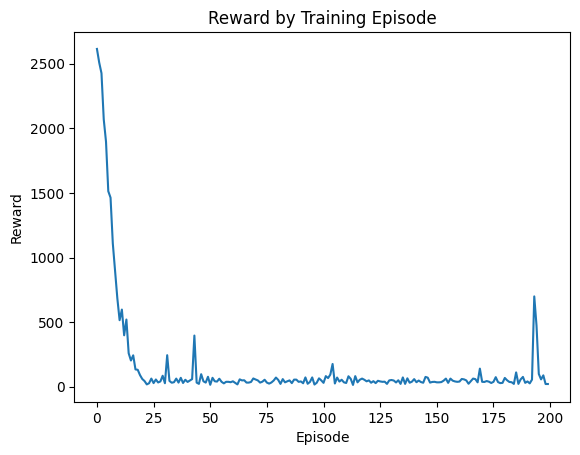

In [14]:
plt.title("Reward by Training Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(ending_ep_rewards)
plt.show()

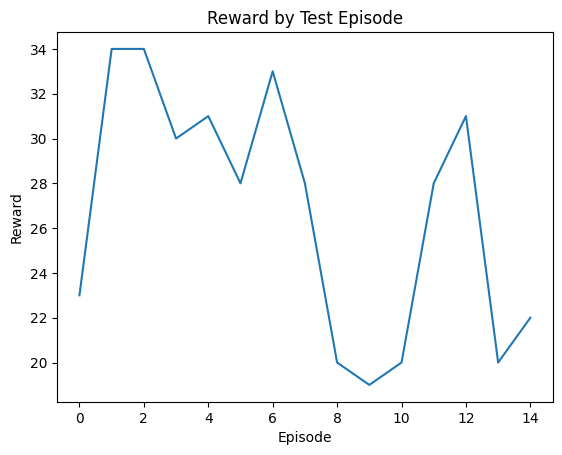

In [15]:
plt.figure()
plt.title("Reward by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot([stat['total_reward'] for stat in test_stats])
plt.show()

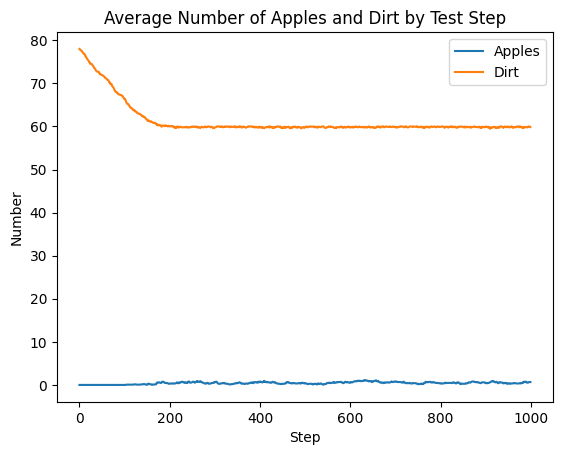

In [16]:
plt.figure()
plt.title("Average Number of Apples and Dirt by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_apples = []
avg_num_dirt = []
for i in range(max_steps_per_episode):
    avg_num_apples.append(np.mean([stat['num_apples'][i] for stat in test_stats]))
    avg_num_dirt.append(np.mean([stat['num_dirt'][i] for stat in test_stats]))
plt.plot(avg_num_apples, label="Apples")
plt.plot(avg_num_dirt, label="Dirt")
plt.legend()
plt.show()

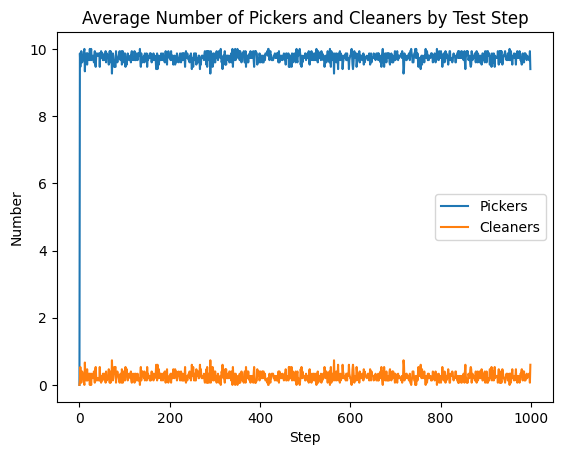

In [17]:
plt.figure()
plt.title("Average Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_pickers = []
avg_num_cleaners = []
for i in range(max_steps_per_episode):
    avg_num_pickers.append(np.mean([stat['pickers'][i] for stat in test_stats]))
    avg_num_cleaners.append(np.mean([stat['cleaners'][i] for stat in test_stats]))
plt.plot(avg_num_pickers, label="Pickers")
plt.plot(avg_num_cleaners, label="Cleaners")
plt.legend()
plt.show()

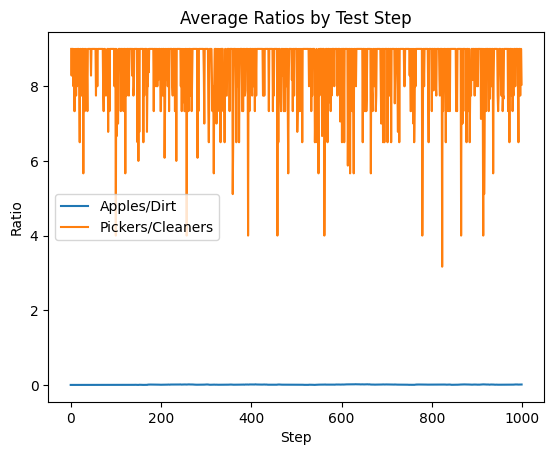

In [18]:
plt.figure()
plt.title("Average Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
avg_apple_dirt_ratios = []
apple_dirt_steps = []
avg_picker_cleaner_ratios = []
picker_cleaner_steps = []
for i in range(max_steps_per_episode):
    #avg_apple_dirt_ratios.append(np.mean([stat['num_apples'][i] / (stat['num_dirt'][i] + 1e-8) for stat in test_stats]))
    #avg_picker_cleaner_ratios.append(np.mean([stat['pickers'][i] / (stat['cleaners'][i]) for stat in test_stats if stat['cleaners'][i] > 0]))
    apple_dirt = []
    picker_cleaner = []
    for stat in test_stats:
        if stat['num_dirt'][i] > 0:
            apple_dirt.append(stat['num_apples'][i] / stat['num_dirt'][i])
        if stat['cleaners'][i] > 0:
            picker_cleaner.append(stat['pickers'][i] / stat['cleaners'][i])
    if len(apple_dirt) > 0:
        avg_apple_dirt_ratios.append(np.mean(apple_dirt))
        apple_dirt_steps.append(i)
    if len(picker_cleaner) > 0:
        avg_picker_cleaner_ratios.append(np.mean(picker_cleaner))
        picker_cleaner_steps.append(i)

plt.plot(apple_dirt_steps, avg_apple_dirt_ratios, label="Apples/Dirt")
plt.plot(picker_cleaner_steps, avg_picker_cleaner_ratios, label="Pickers/Cleaners")
plt.legend()
plt.show()

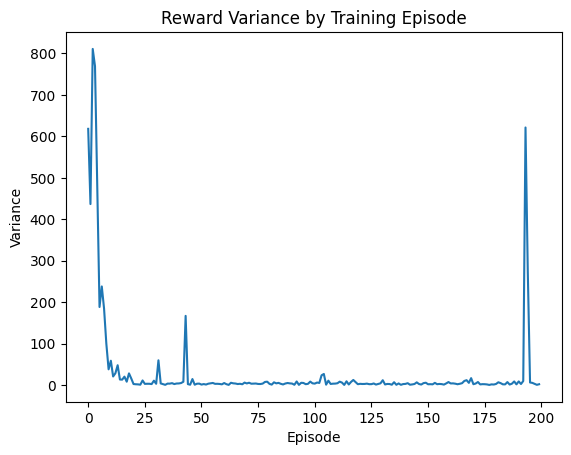

In [19]:
plt.figure()
plt.title("Reward Variance by Training Episode")
plt.xlabel("Episode")
plt.ylabel("Variance")
plt.plot(agent_reward_variances)
plt.show()

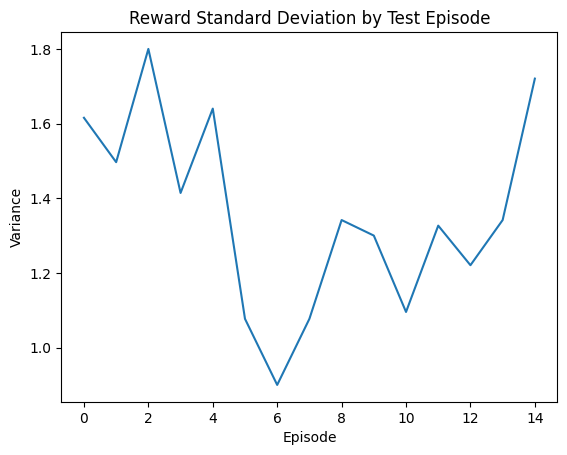

In [20]:
plt.figure()
plt.title("Reward Standard Deviation by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Variance")
plt.plot([np.sqrt(stat['agent_reward_variances']) for stat in test_stats])
plt.show()

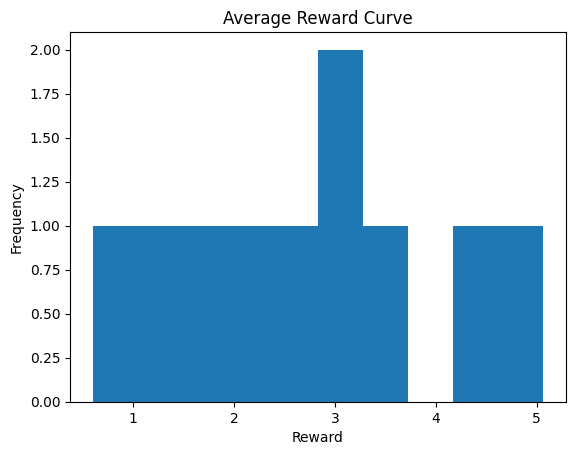

In [21]:
plt.figure()
plt.title("Average Reward Curve")
plt.xlabel("Reward")
plt.ylabel("Frequency")
reward_curve = [0.] * num_agents
for stat in test_stats:
    reward_by_agent = sorted(stat['total_reward_by_agent'])
    for i in range(num_agents):
        reward_curve[i] += reward_by_agent[i]
for i in range(num_agents):
    reward_curve[i] /= num_test_episodes

plt.hist(reward_curve, bins=num_agents)
plt.show()